In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("files/vinos_final.csv")
df.head()

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,49,58,Espana,Toro,9950,Toro Tinto,50,30
1,Artadi,Vina El Pison,2018,49,31,Espana,Vino de Espana,3135,Tempranillo,40,20
2,Vega Sicilia,Unico,2009,48,1793,Espana,Ribera del Duero,32495,Ribera del Duero Tinto,50,30
3,Vega Sicilia,Unico,1999,48,1705,Espana,Ribera del Duero,69296,Ribera del Duero Tinto,50,30
4,Vega Sicilia,Unico,1996,48,1309,Espana,Ribera del Duero,77806,Ribera del Duero Tinto,50,30


**"EL Vino de Schödinger"**

 - Ni bueno ni malo hasta que miras la acidez

Text(0, 0.5, 'Calificación')

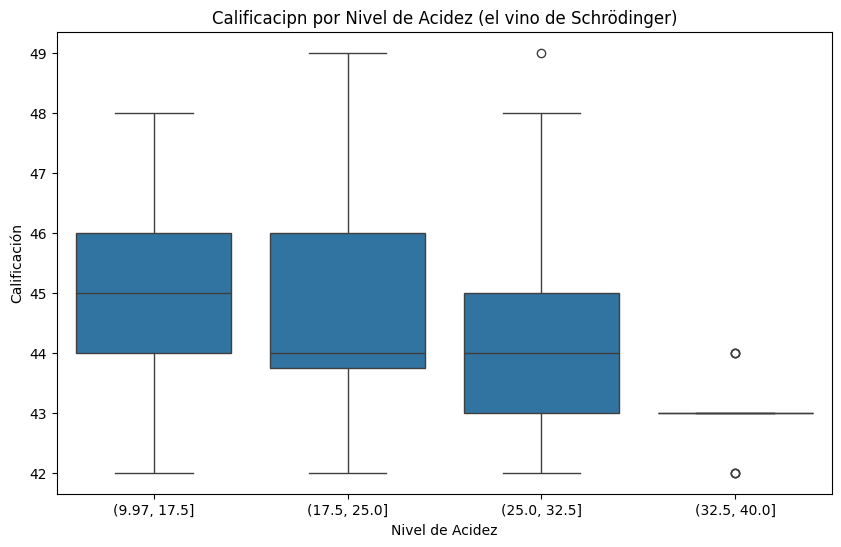

In [9]:
# El objetivo es ananlizar como cambia la clasificación según los niveles de acidez

# Queremos saber si hay un "rango óptimo" antes de pasarse de ácido.

df["acidez"] = pd.to_numeric(df["acidez"], errors="coerce")

df["acidez_bin"] = pd.cut(df["acidez"], bins=4)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="acidez_bin", y="calificacion")

plt.title("Calificacipn por Nivel de Acidez (el vino de Schrödinger)")
plt.xlabel("Nivel de Acidez")
plt.ylabel("Calificación")

**La Resaca Silenciosa**
 - Vinos que no parecen peligrosos... hasta que lo son.

  - **Objetivo:**
     - Detectar vinos con IP moderado pero con calificación.

In [17]:
# creacion de IP
df["cuerpo"] = pd.to_numeric(df["cuerpo"], errors="coerce")
df["acidez"] = pd.to_numeric(df["acidez"], errors="coerce")

# Creamos el Índice de Pesadez
df["IP"] = df["cuerpo"] - df["acidez"]


Text(0, 0.5, 'Calificación')

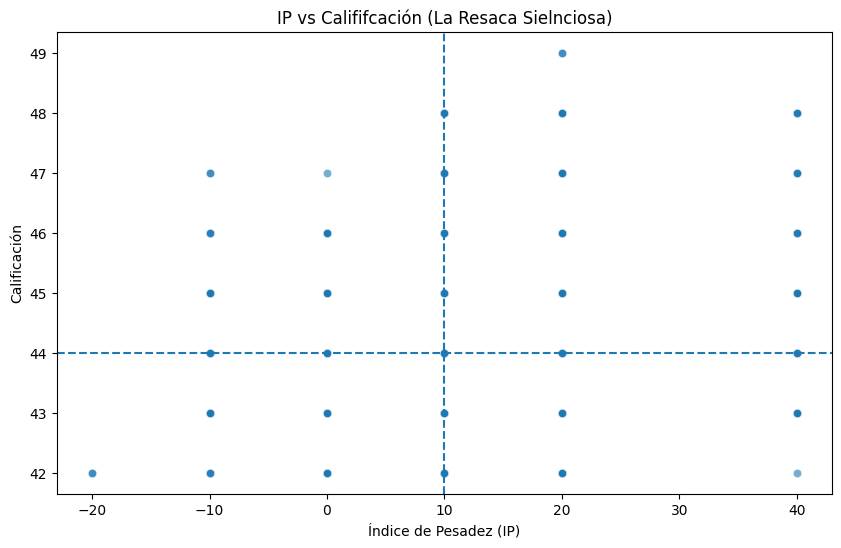

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="IP", y="calificacion", alpha=0.6)

plt.axhline(df["calificacion"].median(), linestyle="--")
plt.axvline(df["IP"].median(),linestyle="--")

plt.title("IP vs Calififcación (La Resaca Sielnciosa)")
plt.xlabel("Índice de Pesadez (IP)")
plt.ylabel("Calificación")

**El Euro Mejor Gastado**
   
   Dónde cada Euro trabaja duro.
 - **Objetivo**
   - Ver la distribución del ratio calidad/precio.


Text(0, 0.5, 'Frecuencia')

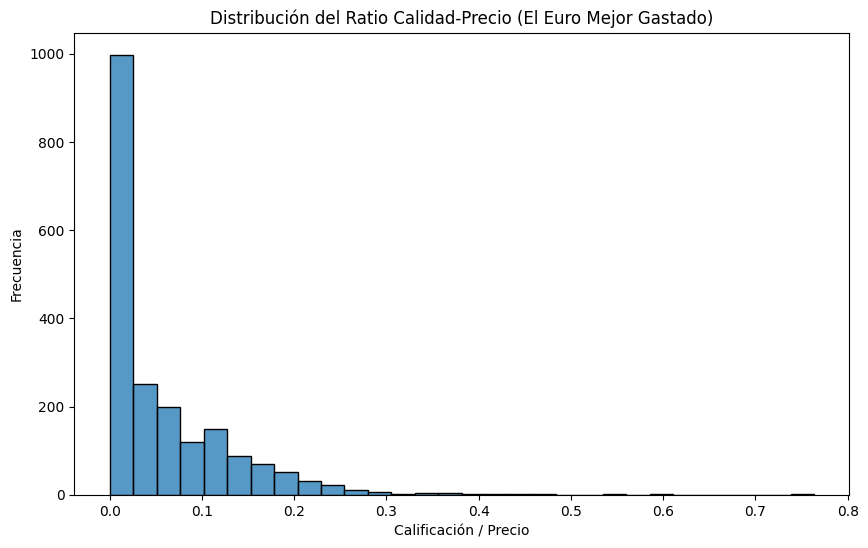

In [20]:
df["precio"] = pd.to_numeric(df["precio"], errors="coerce")

df = df[df["precio"]> 0]

df["valor"] = df["calificacion"] / df["precio"]

plt.figure(figsize=(10,6))
sns.histplot(df["valor"], bins=30)

plt.title("Distribución del Ratio Calidad-Precio (El Euro Mejor Gastado)")
plt.xlabel("Calificación / Precio")
plt.ylabel("Frecuencia")


**Todo Músculo, Cero Técnica"**
  
  Cuando el cuerpo no viene acompañado de talento.
   - Objetivo
      - Comparar calificación media según niveles de cuerpo.

Text(0, 0.5, 'Calificación')

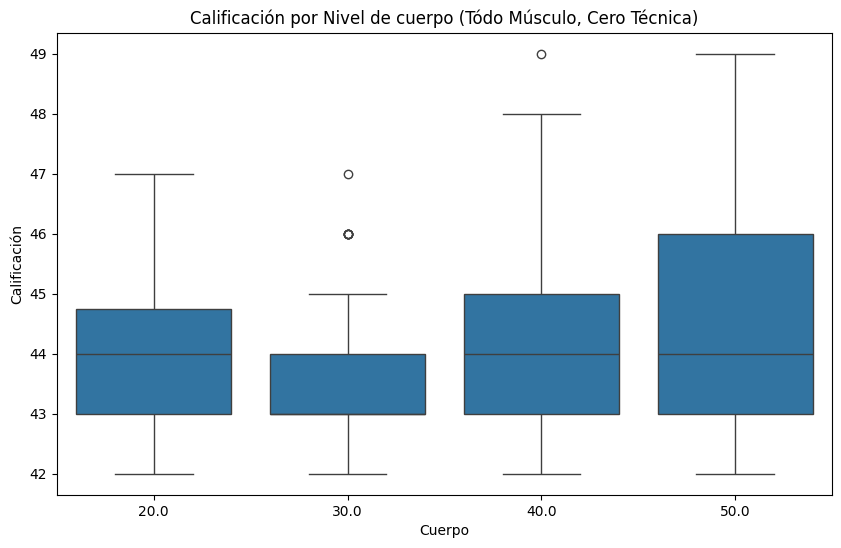

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="cuerpo", y="calificacion")

plt.title("Calificación por Nivel de cuerpo (Tódo Músculo, Cero Técnica)")
plt.xlabel("Cuerpo")
plt.ylabel("Calificación")


**El Precio Psicológico**
 
 Cuando pasar de cierto precio no aporta nada.
  - Objetivo:
     - Analizar la calificación media por tramos de precio.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '(-1058066.042, 176353562.0]'),
  Text(1, 0, '(176353562.0, 352707069.0]'),
  Text(2, 0, '(352707069.0, 529060576.0]'),
  Text(3, 0, '(529060576.0, 705414083.0]'),
  Text(4, 0, '(705414083.0, 881767590.0]'),
  Text(5, 0, '(881767590.0, 1058121097.0]')])

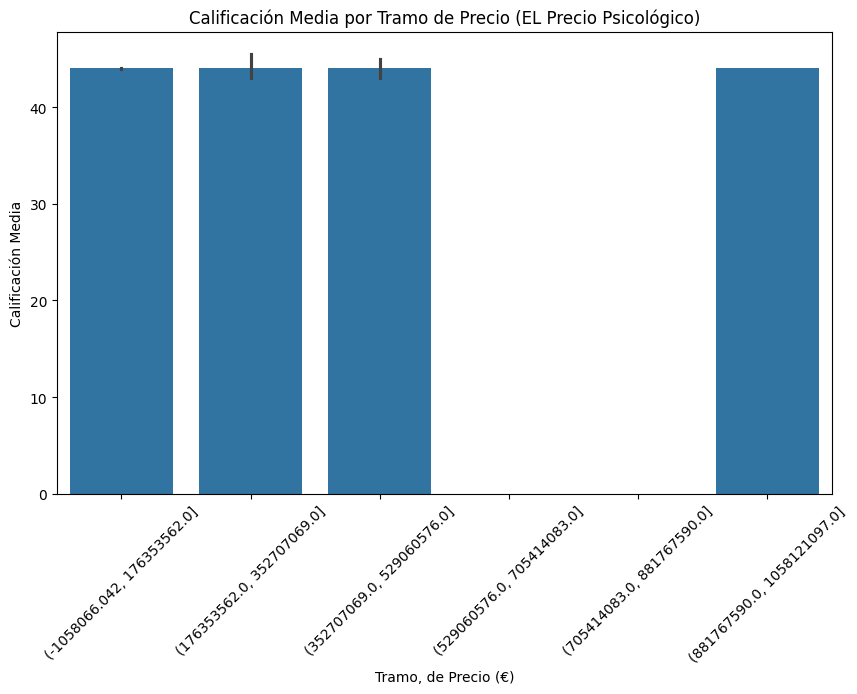

In [24]:
df["precio_bin"]= pd.cut(df["precio"], bins=6)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="precio_bin", y="calificacion")

plt.title(("Calificación Media por Tramo de Precio (EL Precio Psicológico)"))
plt.xlabel("Tramo, de Precio (€)")
plt.ylabel("Calificación Media")
plt.xticks(rotation=45)

**Regiones Bipolares**
 O muy buenas... o muy malas.
  - Objetivo:
    - Analizat la variablidiad de la calificación.

Text(0, 0.5, 'Región')

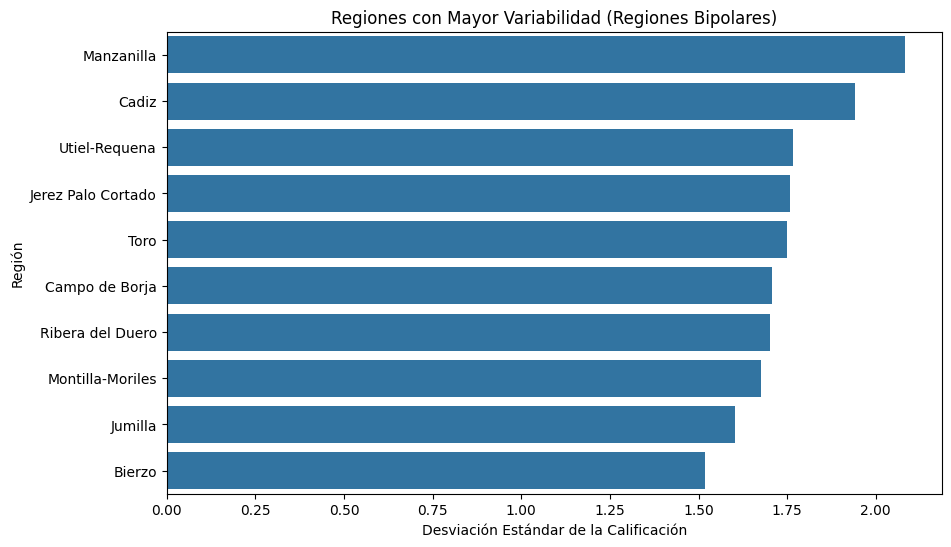

In [25]:
df_region_var =(
    df.groupby("region")["calificacion"].std().sort_values(ascending=False).head(10).reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=df_region_var, x="calificacion", y="region")

plt.title("Regiones con Mayor Variabilidad (Regiones Bipolares)")
plt.xlabel("Desviación Estándar de la Calificación")
plt.ylabel("Región")

**La Ilusión del Promedio"
  La meida queda bien en la presentación...pero engaña.
 - Objetivo:
    - Comprarar media y mediana de calificación.


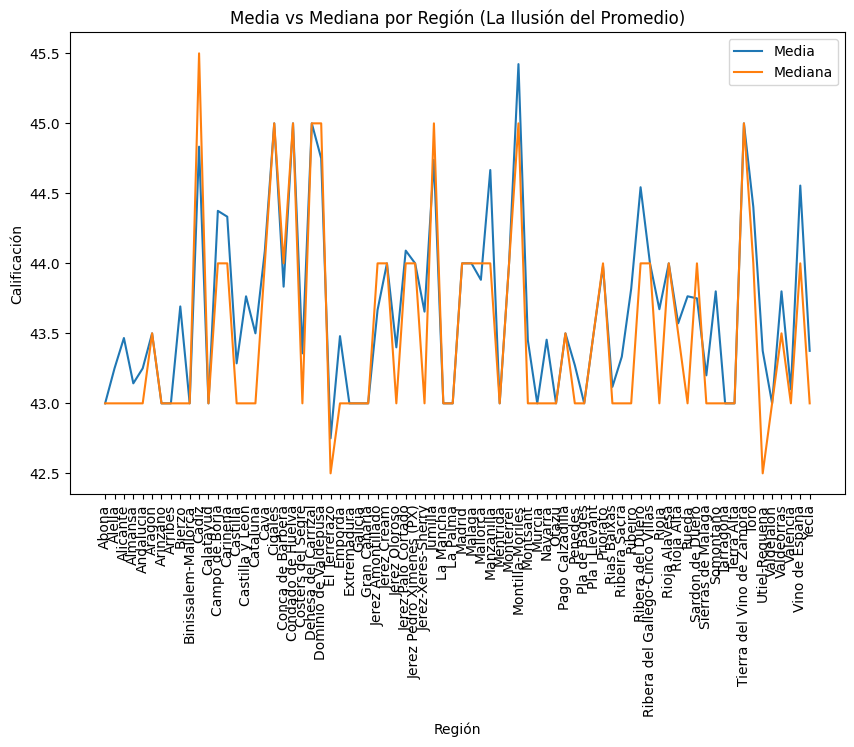

In [26]:
df_region_stats = (
    df.groupby('region')
      .agg(
          media=('calificacion', 'mean'),
          mediana=('calificacion', 'median')
      )
      .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(df_region_stats['region'], df_region_stats['media'], label='Media')
plt.plot(df_region_stats['region'], df_region_stats['mediana'], label='Mediana')

plt.title("Media vs Mediana por Región (La Ilusión del Promedio)")
plt.xlabel("Región")
plt.ylabel("Calificación")
plt.xticks(rotation=90)
plt.legend()
